La idea es ver qué sucede con un entrenamiento sólo de problemas en inglés, después mixto haciendo over sampling, under sampling y tal cual viene el dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
DRIVE_PATH = "/content/drive/MyDrive/Competitive-programming-problems-classification/Github/Competitive-programming-problems-classification/backend"

In [5]:
import pandas as pd
import torch
import numpy as np
from torch import nn
from torch.optim import Adam
from tqdm import tqdm
from pprint import pprint

6242
(9770, 2)
math               2568
data structures    2156
sortings           1389
graphs             1282
number theory      1034
strings             801
geometry            540
Name: category, dtype: int64


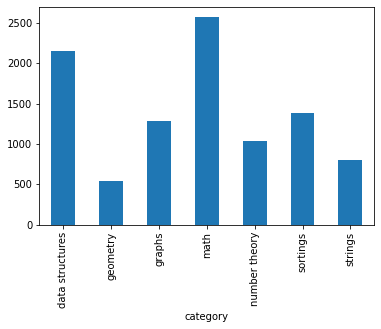

In [46]:
import json 

startingTopics = [
    "sortings",
    "strings",
    # "greedy",
    "number theory",
    "math",
    "graphs",
    "geometry",
    "data structures",
]

def getAllProblems():
  problems = []
  folder = "/content/drive/MyDrive/Competitive-programming-problems-classification/Github/Competitive-programming-problems-classification/backend"
  for topic in startingTopics:
    codeforcesProblems = json.load(open(f"{folder}/data/codeforces-{topic}.json"))
    problems.extend(codeforcesProblems)
    # omegaupProblems = json.load(open(f"data/omegaup-{topic}.json"))
    # problems.extend(omegaupProblems)

  return problems

# Shrink list of topics to nlp.startingTopics only
# Duplicate problems for each category
problems = getAllProblems()
print(len(problems))

problemsForDf = []
for problem in problems:
  for topic in problem['topics']:
    if topic in startingTopics:
      problemsForDf.append({
        'text': problem['history'],
        'category': topic,
      })

df = pd.DataFrame(problemsForDf)

def showCategories(df, title='Categories count'):
  print(df.category.value_counts())
  df.groupby(['category']).size().plot.bar()

print(df.shape)
showCategories(df)


In [7]:
def getTopicIndexMap():
  map = {}
  for index, topic in enumerate(startingTopics):
    map[topic] = int(index)
  return map

topicIndexMap = getTopicIndexMap()
topicIndexMap

{'sortings': 0,
 'strings': 1,
 'greedy': 2,
 'number theory': 3,
 'math': 4,
 'graphs': 5,
 'geometry': 6,
 'data structures': 7}

In [47]:
# Oversampling and under sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

def sampleData(df, strategy):
  x = df.drop('category', axis=1)
  y = df['category']
  x_sample, y_sample = strategy.fit_resample(x, y)
  new_df = pd.concat(
      [pd.DataFrame(x_sample), pd.DataFrame(y_sample, columns=['category'])], 
      axis=1
  )
  print(new_df.shape)
  return new_df

(26328, 2)
greedy             3291
sortings           3291
math               3291
strings            3291
graphs             3291
data structures    3291
number theory      3291
geometry           3291
Name: category, dtype: int64


,text,category
0,You are participating in Yet Another Tournamen...,greedy
1,You are participating in Yet Another Tournamen...,sortings
2,An array a is called ugly if it contains at le...,math
3,An array a is called ugly if it contains at le...,sortings
4,Let' s call a string balanced if all character...,greedy


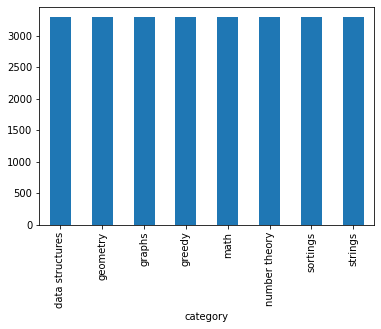

In [9]:
ros = RandomOverSampler(random_state=42)
over_sampling_df = sampleData(df, ros)
showCategories(over_sampling_df, title="RandomOverSampler")
over_sampling_df.head()

In [42]:
merged_over_sampling_dict = {}
for text, topic in over_sampling_df.values:
  if text in merged_over_sampling_dict:
    merged_over_sampling_dict[text].add(topic)
  else: 
    merged_over_sampling_dict[text] = set([topic])

print(len(merged_over_sampling_dict))

5270


AttributeError: ignored

(4528, 2)
data structures    566
geometry           566
graphs             566
greedy             566
math               566
number theory      566
sortings           566
strings            566
Name: category, dtype: int64


,text,category
0,Genos and Saitama went shopping for Christmas ...,data structures
1,This is the hard version of the problem. The o...,data structures
2,Tokitsukaze has a permutation p of length n . ...,data structures
3,"After Fox Ciel got off a bus, she found that t...",data structures
4,The only difference between easy and hard vers...,data structures


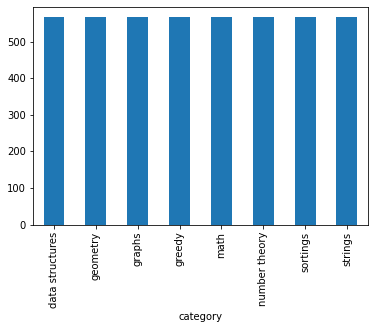

In [ ]:
rus = RandomUnderSampler(random_state=42)
under_sampling_df = sampleData(df, rus)
showCategories(under_sampling_df, title="RandomUnderSampler")
under_sampling_df.head()